In [1]:
import graphviz

In [33]:
dot = graphviz.Digraph(format='jpg')

In [34]:
dot.attr('node', shape='plaintext', fontname='Cascadia Code', fontsize='10')

In [35]:
dot.node('person', 'Person')

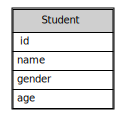

In [177]:
dot.node(
    'student',
    label='''<
<table border="1" cellborder="1" cellspacing="0" cellpadding="3">
    <tr><td bgcolor="#cfcfcf" width="100" cellpadding="5" >Student</td></tr>
    <tr><td align="left" >  id</td></tr>
    <tr><td align="left" >name</td></tr>
    <tr><td align="left" >gender</td></tr>
    <tr><td align="left" >age</td></tr>
</table>
    >'''
)
dot

In [48]:
class Entity:
    HEADER_BGCOLOR = '#cfcfcf'
    HEADER_MIN_WIDTH = '72'
    HEADER_CELL_PADDING = '5'
    
    FIELD_ALIGN = 'left'
    FIELD_MIN_WIDTH = '56'
    
    HEADER_TPLT = '\t<tr><td {attrs}>{field_name}</td></tr>'
    ROW_TPLT = '\t<tr><td {attrs} port="{field_name}">  {field_name}</td></tr>'
    TABLE_TPLT = '<table border="1" cellborder="0" cellspacing="0" cellpadding="2">{rows}</table>'
    
    PRIMARY_KEY_IDENTIFIER = 'ID'
    FOREIGN_KEY_IDENTIFIER = 'idx'

    def __init__(self, tablename: str, fields: list = None):
        """
        fields:
            ```
            ['id', 'name', 'age', ...]
            ```
        """
        self.tablename = tablename
        self.fields = fields
        self._node = None
        
    def get_header(self):
        attrs = ''
        attr_map = {
            'bgcolor': self.HEADER_BGCOLOR,
            'width': self.HEADER_MIN_WIDTH,
            'cellpadding': self.HEADER_CELL_PADDING,
        }
        for k, v in attr_map.items():
            attrs += f'{k}="{v}" '
        return self.HEADER_TPLT.format(attrs=attrs, field_name=self.tablename.capitalize())
        
    def get_row(self, field):
        attrs = ''
        attr_map = {
            'align': self.FIELD_ALIGN,
        }
        for k, v in attr_map.items():
            attrs += f'{k}="{v}" '
        field_name = field
        return self.ROW_TPLT.format(attrs=attrs, field_name=field_name)
        
    def get_table(self, hdr, rows):
        rows = '\n'.join(['', hdr, *rows, ''])
        return self.TABLE_TPLT.format(rows=rows)
        
    def update_node(self):
        assert self.fields is not None
        hdr = self.get_header()
        rows = [self.get_row(field) for field in fields]
        self._node = self.get_table(hdr, rows)
        return self._node
    
    @property
    def node_name(self):
        return self.tablename
        
    @property
    def label(self):
        return '<' + (self._node or self.update_node()) + '>'
    
    def __getattribute__(self, name: str, /):
        if name.startswith('port_') and name[5:] in self.fields:
            return '{}:{}'.format(self.tablename, name[5:])
        return super().__getattribute__(name)
    
class ERGraph(graphviz.Digraph):
    def __init__(self, *args, entities, **kwargs):
        super().__init__(*args, **kwargs)
        self.attr('node', shape='plaintext', fontname='Cascadia Code', fontsize='10')
        self.entities = set()
        assert isinstance(entities, list)
        for ent in entities:
            self.add_entity(ent)
        
    def add_entity(self, ent):
        assert isinstance(ent, Entity), type(ent) + "is not instance of Entity"
        self.node(ent.node_name, ent.label)
        self.entities.add(ent)

In [49]:
# fields = [
#     {
#         'name': 'id',
#         'primary_key': True,
#     },
#     {
#         'name': 'name',
#     },
#     {
#         'name': 'gender',
#     },
#     {
#         'name': 'age',
#     },
# ]
fields = ['id', 'name', 'age', 'gender',]

In [50]:
e = Entity('student', fields)

In [51]:
print(e.label)

<<table border="1" cellborder="0" cellspacing="0" cellpadding="2">
	<tr><td bgcolor="#cfcfcf" width="72" cellpadding="5" >Student</td></tr>
	<tr><td align="left"  port="id">  id</td></tr>
	<tr><td align="left"  port="name">  name</td></tr>
	<tr><td align="left"  port="age">  age</td></tr>
	<tr><td align="left"  port="gender">  gender</td></tr>
</table>>


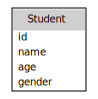

In [52]:
g = graphviz.Digraph(format='jpg')
g.attr('node', shape='plaintext', fontname='Cascadia Code', fontsize='10')
g.node(e.tablename, label=e.label)
g

In [53]:
Entity

__main__.Entity

In [54]:
e

In [55]:
er = ERGraph(entities=[e])

In [56]:
er.node('A')

In [57]:
er.edge(e.port_age, 'A')

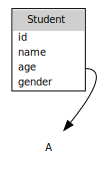

In [58]:
er